## Data Understanding

xxxxx

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("churn_data.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Check out the dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Check out the data dimension
data.shape

(3333, 21)

The dataset consists of 3,333 entries and 21 columns, with features such as 'account length', 'international plan', 'total day minutes', 'customer service calls', and the target variable 'churn'. The target variable is binary, indicating whether a customer churned (True) or not (False). The dataset includes both numerical and categorical features, with no immediately visible missing values.

#### Churn Distribution

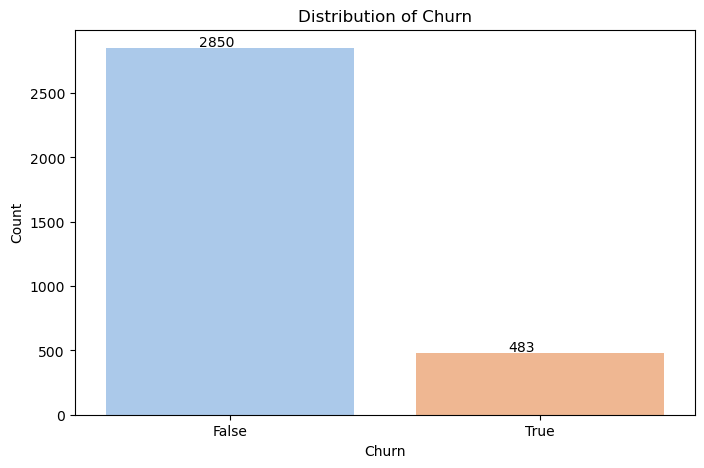

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for the churn variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='churn', data=data, palette='pastel')

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 10))

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The count plot shows that the dataset is imbalanced, with fewer customers labeled as churned (True) compared to those who did not churn (False).

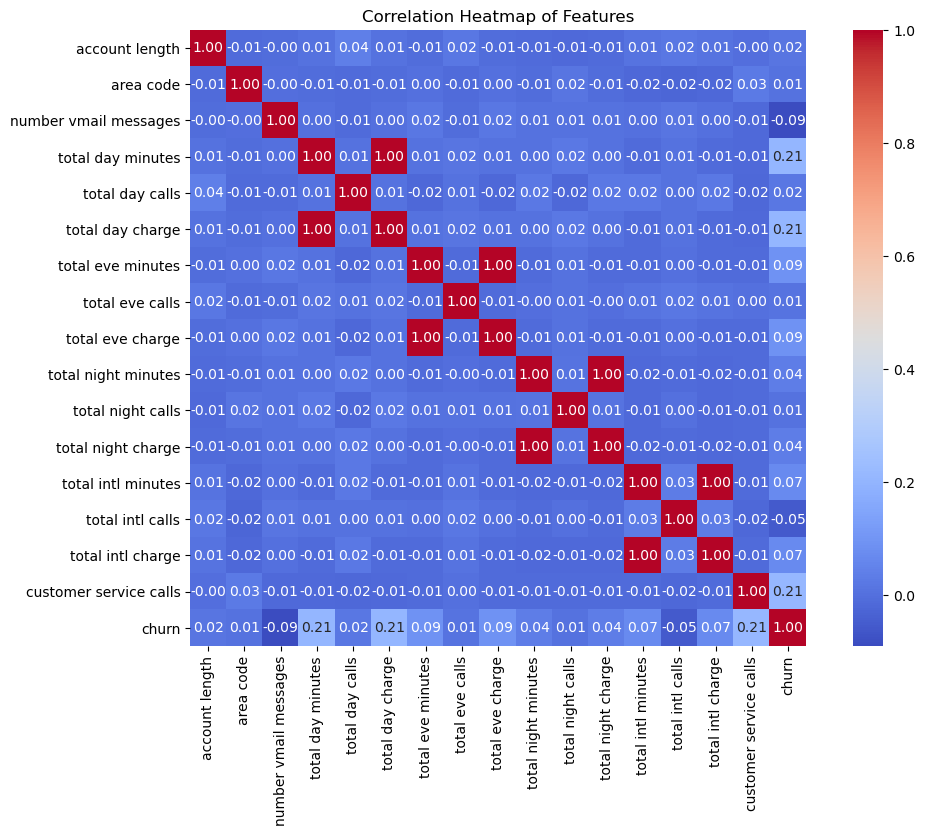

In [7]:
# Heatmap to show correlation between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

The heatmap indicates the correlations between numerical features. For instance, total day minutes is highly correlated with total day charge, which is expected as charges are typically calculated based on usage. There are no strong correlations between most features, suggesting that multicollinearity might not be a significant issue.

In [2]:
# Data Preprocessing

# Dropping the 'phone number' column as it's not useful for prediction
churn_data = churn_data.drop(columns=['phone number'])

# Encoding categorical variables: 'international plan', 'voice mail plan', and 'state'
churn_data['international plan'] = churn_data['international plan'].map({'yes': 1, 'no': 0})
churn_data['voice mail plan'] = churn_data['voice mail plan'].map({'yes': 1, 'no': 0})

# For 'state', using one-hot encoding since it has multiple categories
churn_data = pd.get_dummies(churn_data, columns=['state'], drop_first=True)

# Summary after preprocessing
churn_data_info_post = churn_data.info()
churn_data_head_post = churn_data.head()

# Perform basic EDA
# Checking the distribution of the target variable
churn_distribution = churn_data['churn'].value_counts(normalize=True)

# Correlation matrix
correlation_matrix = churn_data.corr()

churn_data_info_post, churn_data_head_post, churn_distribution, correlation_matrix


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

(None,
    account length  area code  international plan  voice mail plan  \
 0             128        415                   0                1   
 1             107        415                   0                1   
 2             137        415                   0                0   
 3              84        408                   1                0   
 4              75        415                   1                0   
 
    number vmail messages  total day minutes  total day calls  \
 0                     25              265.1              110   
 1                     26              161.6              123   
 2                      0              243.4              114   
 3                      0              299.4               71   
 4                      0              166.7              113   
 
    total day charge  total eve minutes  total eve calls  ...  state_SD  \
 0             45.07              197.4               99  ...         0   
 1             27.47         

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define the features and target
X = churn_data[['account length', 'international plan', 'voice mail plan', 'number vmail messages',
                'total day minutes', 'total eve minutes', 'total night minutes', 
                'total intl minutes', 'customer service calls'] + 
               [col for col in churn_data.columns if col.startswith('state_')]]
y = churn_data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.861,
 array([[825,  30],
        [109,  36]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       0.88      0.96      0.92       855\n        True       0.55      0.25      0.34       145\n\n    accuracy                           0.86      1000\n   macro avg       0.71      0.61      0.63      1000\nweighted avg       0.83      0.86      0.84      1000\n')

In [4]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Norm used in the penalization
    'solver': ['liblinear']         # Solver that supports l1 and l2 penalties
}

# Initialize the logistic regression model
logistic_model_tuning = LogisticRegression(max_iter=1000, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(logistic_model_tuning, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Evaluate the tuned model on the test set
y_pred_tuned = grid_search.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

best_params, accuracy_tuned, conf_matrix_tuned, class_report_tuned

({'C': 10, 'penalty': 'l1', 'solver': 'liblinear'},
 0.86,
 array([[824,  31],
        [109,  36]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       0.88      0.96      0.92       855\n        True       0.54      0.25      0.34       145\n\n    accuracy                           0.86      1000\n   macro avg       0.71      0.61      0.63      1000\nweighted avg       0.83      0.86      0.84      1000\n')

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a simple decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate the decision tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

accuracy_tree, conf_matrix_tree, class_report_tree

(0.903,
 array([[814,  41],
        [ 56,  89]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       0.94      0.95      0.94       855\n        True       0.68      0.61      0.65       145\n\n    accuracy                           0.90      1000\n   macro avg       0.81      0.78      0.80      1000\nweighted avg       0.90      0.90      0.90      1000\n')

In [6]:
# Define the hyperparameters grid to search for the decision tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree model
decision_tree_tuning = DecisionTreeClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_tree = GridSearchCV(decision_tree_tuning, param_grid_tree, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search_tree.fit(X_train_scaled, y_train)

# Best parameters from the grid search
best_params_tree = grid_search_tree.best_params_

# Evaluate the tuned decision tree model on the test set
y_pred_tree_tuned = grid_search_tree.predict(X_test_scaled)
accuracy_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
conf_matrix_tree_tuned = confusion_matrix(y_test, y_pred_tree_tuned)
class_report_tree_tuned = classification_report(y_test, y_pred_tree_tuned)

best_params_tree, accuracy_tree_tuned, conf_matrix_tree_tuned, class_report_tree_tuned

({'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 0.93,
 array([[840,  15],
        [ 55,  90]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       0.94      0.98      0.96       855\n        True       0.86      0.62      0.72       145\n\n    accuracy                           0.93      1000\n   macro avg       0.90      0.80      0.84      1000\nweighted avg       0.93      0.93      0.93      1000\n')